In [1]:
from subhalos_SA2_comp import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
M0=1e12                         #Mass of the host halo.
redshift = 0.
N_ma=100                        #number of subhalo mass values in a given range.
zmax=7                          #highest redshift value for mass accretion.
N_r=20                         #The number of radius values in the given range [0.01,1]

logmamin=-6                     #The minimum subhalos' masss in units of ln(mass).
mmodel_1=5                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=1                      #This dm/dt model correspond to the model with no spatial information.


#Calculation of scale and virial radius of the host halo for z=redshift and mass=M0.
c = c_from_Mvir(Mvir=M0*Msolar,z=redshift)
Oz = Omegaz(pOmega,redshift)
rvir = (3.*M0*Msolar/(4.*np.pi*rhocrit(redshift)*Delc(Oz-1)))**(1./3.)
rs = rvir/c

## My model:

In [3]:
ma200_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new, survive_new,r_new,zacc_new  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_1,
                       rmin=0.001,rmax=1,logr=True)

/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/SA_comparison/subhalos_SA2_comp.py:179: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/SA_comparison/subhalos_SA2_comp.py:179: RuntimeWarning: overflow encountered in exp
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/SA_comparison/subhalos_SA2_comp.py:215: RuntimeWarning: invalid value encountered in true_divide
  Phi = Ffunc_Yang(delcM,delca,sM,sa)/normB*np.heaviside(mmax-ma,0)


In [4]:
#Calculating number density in [kpc^-3]:
def my_model(r_new,weight_new,z_low,m0_new=m0_new,survive_new=survive_new,zacc_new=zacc_new,N_r=N_r):
    w=(m0_new>1)*(zacc_new>z_low)
    bins=np.logspace(np.log10(0.001),0,N_r+1)
    #Calculating subhalo-distance relation of N(r):
    Nsh_new,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
    q_new=(bins[1:]+bins[:-1])/2.
    dq_new=bins[1:]-bins[:-1]
    #Calculating number density n(r)= N(r)/dV,with dV=(4*pi*r**2)*dr:
    nsh_list_new = Nsh_new/(4.*np.pi*dq_new*q_new**2*(rvir/kpc)**3)
    return q_new,nsh_list_new

In [5]:
q_new,nsh_list_new=my_model(r_new,weight_new,z_low=0,zacc_new=zacc_new,N_r=N_r)
q_new2,nsh_list_new2=my_model(r_new,weight_new,z_low=0.2,zacc_new=zacc_new,N_r=N_r)

## Schin'ichiro's code:

In [6]:
#Spatial information through NFW witc c=c(z=0,M=M0):
q_list = np.logspace(-3,0,N_r)*0.99
nsh_list = np.empty_like(q_list)
for i in np.arange(np.alen(q_list)):
    q = q_list[i]
    ma200,rs_a,rhos_a,m0,rs0,rhos0,ct0,weight,survive_new \
        = rs_rhos_calc_one_r(M0=M0,radius=q,redshift=redshift,
                             logmamin=logmamin,N_ma=N_ma,
                             zmax=zmax,mmodel=mmodel_1)
    Nsh = np.sum(weight[(m0>1)*(survive_new==1)])
    r = q*rvir
    #Adding spatial weights:
    nsh = Nsh/(4.*np.pi*r*(r+rs)**2*(np.log(1.+c)-c/(1.+c)))
    nsh_list[i] = nsh/(kpc**-3)

/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/SA_comparison/subhalos_SA2_comp.py:516: RuntimeWarning: invalid value encountered in true_divide
  rhos_z0[iz] = (4.625/(4*np.pi*G))*pow(Vmax_z0/rs_z0[iz],2)


In [7]:
#No spatial information:
q_list2 = np.logspace(-3,0,N_r)*0.99
nsh_list2 = np.empty_like(q_list2)
ma200,rs_a,rhos_a,m0,rs0,rhos0,ct0,weight,survive_new \
    = rs_rhos_calc_one_r(M0=M0,radius=0.1,redshift=redshift,
                         logmamin=logmamin,N_ma=N_ma,
                         zmax=zmax,mmodel=1)

for i in np.arange(np.alen(q_list)):
    q = q_list2[i]

    Nsh = np.sum(weight[(m0>1)*(survive_new==1)])
    r = q*rvir
    #Adding spatial weights:
    nsh = Nsh/(4.*np.pi*r*(r+rs)**2*(np.log(1.+c)-c/(1.+c)))
    nsh_list2[i] = nsh/(kpc**-3)

## Comparison between my model and Schin'ichiro's code:

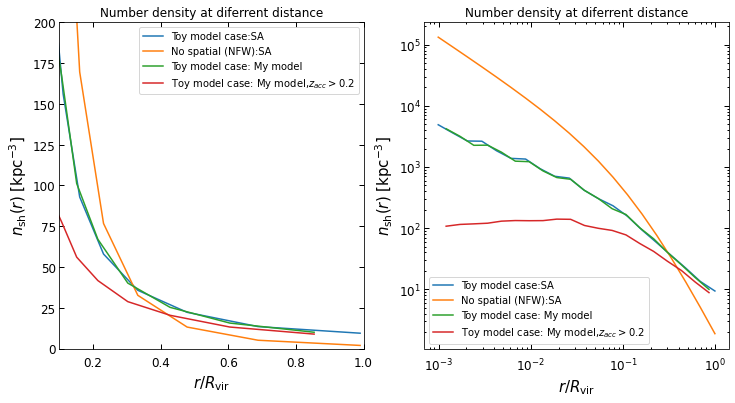

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.plot(q_list,nsh_list)
    ax.plot(q_list2,nsh_list2)
    ax.plot(q_new,nsh_list_new)
    ax.plot(q_new2,nsh_list_new2)
    ax.set_title("Number density at diferrent distance",fontsize=12)
    ax.legend(['Toy model case:SA','No spatial (NFW):SA','Toy model case: My model',
               r'Toy model case: My model,$z_{acc}>0.2$'],fontsize=10)
    ax.set_xlabel(r'$r/R_{\rm vir}$')
    ax.set_ylabel(r'$n_{\rm sh}(r)$ [kpc$^{-3}$]')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0.1,1)
ax1.set_ylim(0,200)
#plt.savefig('num_den_comp.png')

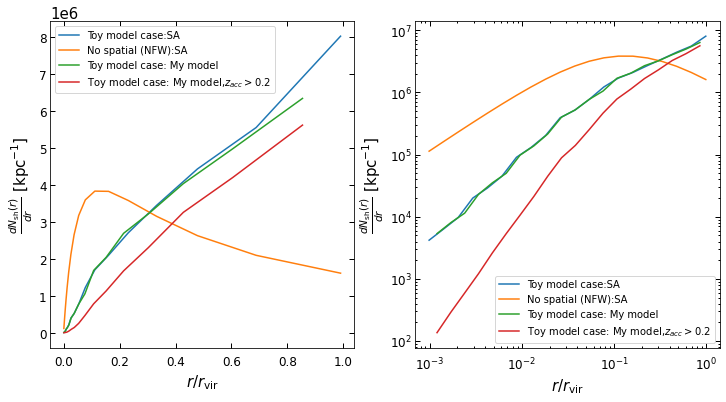

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

dA_SA_SP=(4.*np.pi*(q_list*rvir/kpc)**2)
dA_SA_NSP=(4.*np.pi*(q_list2*rvir/kpc)**2)
dA_MMod=(4.*np.pi*(q_new*rvir/kpc)**2)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.plot(q_list,nsh_list*dA_SA_SP)
    ax.plot(q_list2,nsh_list2*dA_SA_NSP)
    ax.plot(q_new,nsh_list_new*dA_MMod)
    ax.plot(q_new2,nsh_list_new2*dA_MMod)
    ax.legend(['Toy model case:SA','No spatial (NFW):SA','Toy model case: My model',
               r'Toy model case: My model,$z_{acc}>0.2$'],fontsize=10)
    ax.set_xlabel(r'$r/r_{\rm vir}$')
    ax.set_ylabel(r'$\frac{dN_{\rm sh}(r)}{dr}$ [kpc$^{-1}$]')

    
ax2.set_xscale('log')
ax2.set_yscale('log')
#plt.savefig('rad_dist_comp.png')